In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [7]:
df = pd.read_csv('input/train.csv', nrows=6000000)
df

,acoustic_data,time_to_failure
0,12,1.469100
1,6,1.469100
2,8,1.469100
3,5,1.469100
4,8,1.469100
5,8,1.469100
6,9,1.469100
7,7,1.469100
8,-5,1.469100
9,3,1.469100


In [9]:
df[df['time_to_failure'] == df['time_to_failure'].min()]

,acoustic_data,time_to_failure
5656573,4,0.000795


In [10]:
df[5656563 : 5656583]

,acoustic_data,time_to_failure
5656563,4,0.000795
5656564,4,0.000795
5656565,7,0.000795
5656566,2,0.000795
5656567,2,0.000795
5656568,0,0.000795
5656569,0,0.000795
5656570,2,0.000795
5656571,4,0.000795
5656572,5,0.000795


In [11]:
df['acoustic_data'].max()

3252

In [12]:
df['acoustic_data'].min()

-4621

In [13]:
df[df['acoustic_data'] == df['acoustic_data'].max()]

,acoustic_data,time_to_failure
4438687,3252,0.316797


In [14]:
df[4438677 : 4438697]

,acoustic_data,time_to_failure
4438677,-1698,0.316797
4438678,-1126,0.316797
4438679,-498,0.316797
4438680,152,0.316797
4438681,805,0.316797
4438682,1422,0.316797
4438683,1987,0.316797
4438684,2471,0.316797
4438685,2860,0.316797
4438686,3124,0.316797


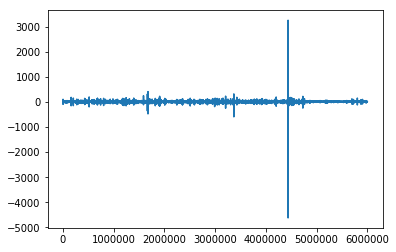

In [17]:
plt.plot(df['acoustic_data'])
plt.show()

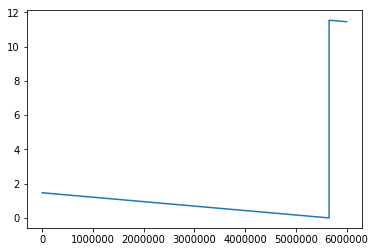

In [18]:
plt.plot(df['time_to_failure'])
plt.show()

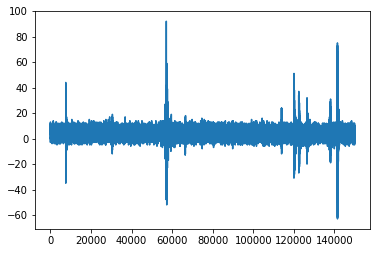

In [24]:
df_test = pd.read_csv('input/test/seg_0a0fbb.csv')
plt.plot(df_test['acoustic_data'])
plt.show()

In [27]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 1000, return_sequences = True, input_shape = (150000, 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 250, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 25))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [38]:
# df.values.shape
# (6000000/150000, 150000, 1)
data = np.stack(np.split(df.values, 6000000/150000))

In [45]:
x_train = data[:, :, 0].reshape(data.shape[0], data.shape[1], 1)
y_train = data[:, :, 1]

In [46]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 10, batch_size = 32)

ValueError: Error when checking target: expected dense_2 to have shape (1,) but got array with shape (150000,)